In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
print("Loaded all libraries")

Loaded all libraries


In [2]:
fpath = "C:/Users/hp/minip/train"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['knife', 'long guns', 'pistol'] 

No. of categories =  3


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1099 
No. of labels loaded =  1099
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1099, 227, 227, 3) 
Labels shape =  (1099,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


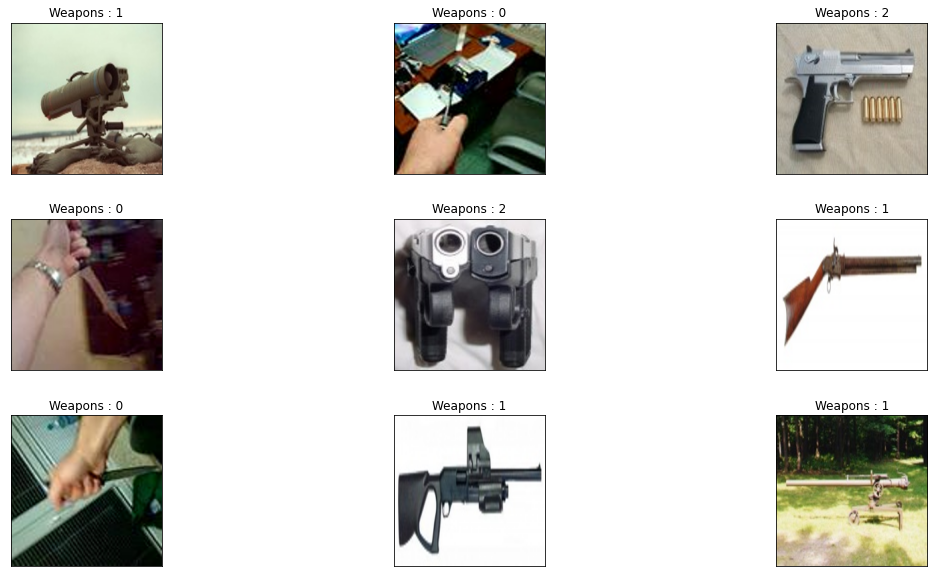

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Weapons : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [6]:
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1096 1097 1098]

'n' values after shuffling =  [ 549 1030  457 ... 1044 1095  860]


In [7]:
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1099, 227, 227, 3) 
Labels shape after shuffling =  (1099,)


In [8]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1099, 227, 227, 3)


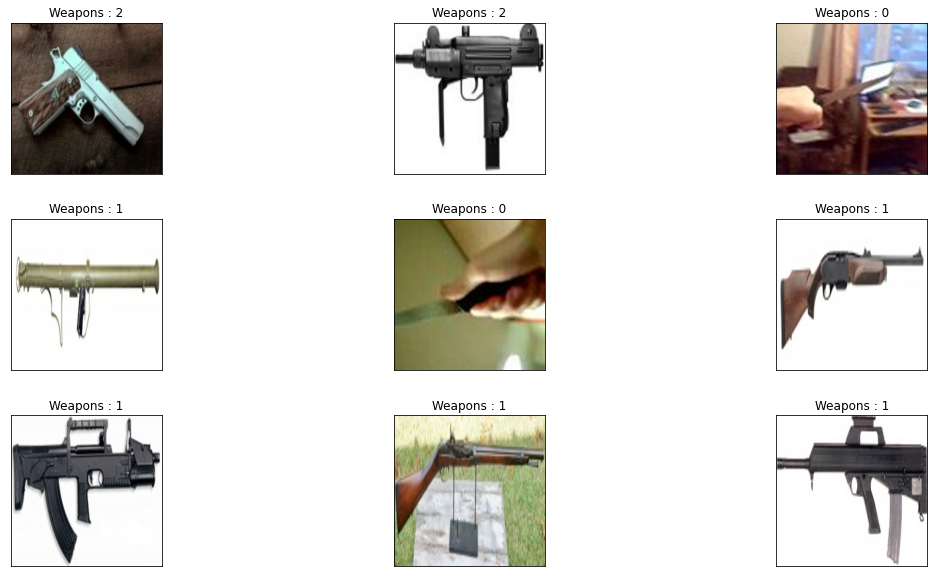

In [9]:
display_rand_images(images, labels)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (879, 227, 227, 3)
y_train shape =  (879,)

x_test shape =  (220, 227, 227, 3)
y_test shape =  (220,)


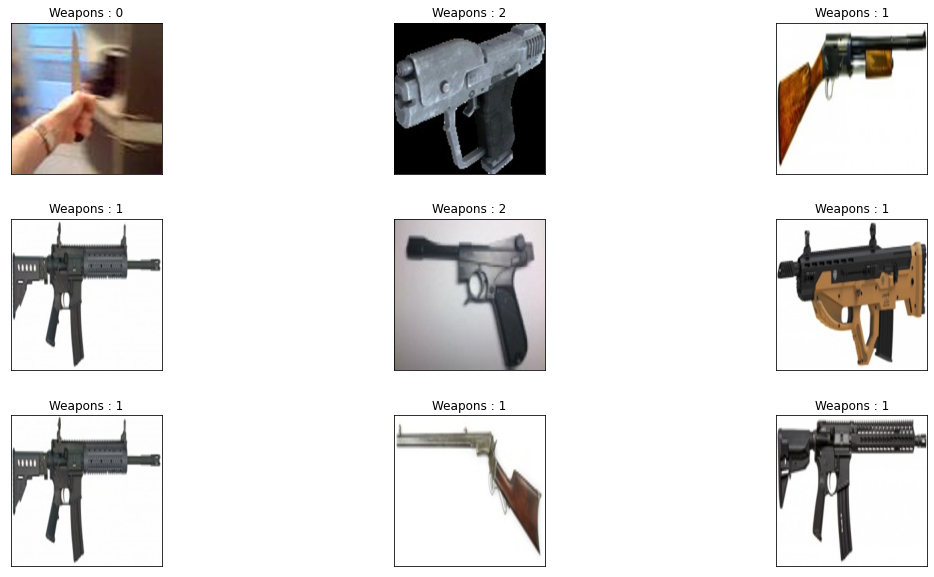

In [11]:
display_rand_images(x_train, y_train)


In [12]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [14]:
%%time
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
28/28 [==============================] - 59s 2s/step - loss: 1.7082 - accuracy: 0.6883
Epoch 2/10
28/28 [==============================] - 54s 2s/step - loss: 0.8190 - accuracy: 0.7998
Epoch 3/10
28/28 [==============================] - 54s 2s/step - loss: 0.8766 - accuracy: 0.7645
Epoch 4/10
28/28 [==============================] - 54s 2s/step - loss: 0.5802 - accuracy: 0.8214
Epoch 5/10
28/28 [==============================] - 54s 2s/step - loss: 0.5104 - accuracy: 0.8237
Epoch 6/10
28/28 [==============================] - 55s 2s/step - loss: 0.4503 - accuracy: 0.8464
Epoch 7/10
28/28 [==============================] - 56s 2s/step - loss: 0.4058 - accuracy: 0.8373
Epoch 8/10
28/28 [==============================] - 55s 2s/step - loss: 0.3208 - accuracy: 0.8783
Epoch 9/10
28/28 [==============================] - 55s 2s/step - loss: 0.3976 - accuracy: 0.8646
Epoch 10/10
28/28 [==============================] - 56s 2s/step - loss: 0.3835 - accuracy: 0.8760
CPU times: total: 3

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

7/7 [==============================] - 4s 475ms/step - loss: 0.8112 - accuracy: 0.8273
0.8112141489982605 0.8272727131843567


In [16]:
pred = model.predict(x_test)

pred.shape

7/7 [==============================] - 4s 474ms/step


(220, 20)

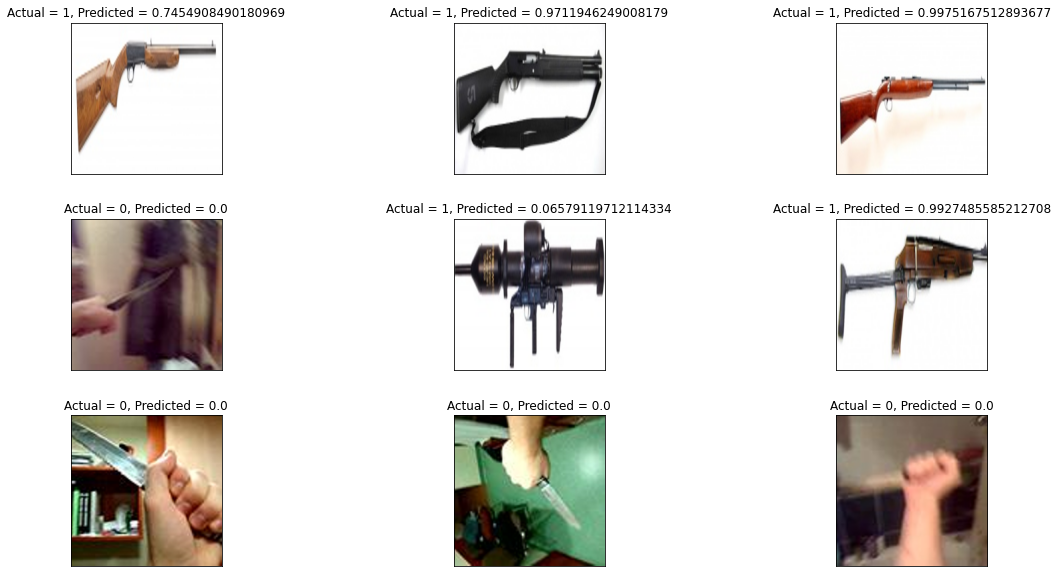

In [17]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [18]:
model.save('model.h5')

the image contains a pistol


(([], []), ([], []))

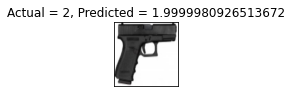

In [27]:
r = np.random.randint( 0, x_test.shape[0], 1)
    
plt.subplot(3, 3, 1)
#plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.imshow(x_test[r[0]])
    
plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
a=y_test[r[0]]*pred[r[0]][y_test[r[0]]]
if a<=0:
    print('The image contains a knife')
elif a<=1:
    print('The image contains a gun')
elif a<=2:
    print('the image contains a pistol')
else:
    print('the image contains no weapons')
plt.xticks([]) , plt.yticks([])